## Северсталь ч.1

#### Постановка задачи:  
  
Сотрудник службы оценки качества продукции заметил, что число бракованных листов стали в партии для стали марки A больше, чем для стали марки B. Также он обратил внимание, что при средней скорости прокатки более 4 м/с число бракованных листов больше. В соответствии с этими наблюдениями, предлагается снизить скорость прокатки и ввести дополнительные меры контроля качества для стали марки A.   
Обоснуйте, что:  
1)	Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.  
2)	При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки.   
Данные, необходимые для анализа, содержатся в файле «Статистика за 2018 год». Количество листов стали в каждой партии предполагается одинаковым. 

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [352]:
df = pd.read_csv('E:\Arc\Synhronized\data\dataset_sev.csv', sep=',', header=0, encoding='cp1251')
df.head()

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
Число бракованных листов    237 non-null int64
Скорость прокатки           237 non-null float64
Марка стали                 237 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [354]:
df.describe()

,Число бракованных листов,Скорость прокатки
count,237.000000,237.000000
mean,3.257384,4.509705
std,1.807821,0.696260
min,0.000000,2.500000
25%,2.000000,4.100000
50%,3.000000,4.600000
75%,4.000000,5.000000
max,8.000000,6.500000


Имеем количественные данные (кол-во бракованных листов в партии) и 2 фактора - марка стали и скорость прокатки ($> 4$ и $\leq 4$).  
требуется проверить значимость факторов.  
  
Выдвигаем гипотезу $H_0 = \{ Кол-во\ бракованных\ листов\ не\ зависит\ ни\ от\ марки\ стали,\ ни\ от\ скорости\ прокатки\}$.  
Или же, перефразируя, среднее кол-во бракованных листов в партии для марок A и B одинаково, для скоростей прокатки - тоже: $H_0 = \{\overline{x_A}=\overline{x_B};\  \overline{x_{>4}}=\overline{x_{\leq4}}\}$  
Уровень надежности положим 0.95.

Для начала посмотрим на распределение целевой переменной, дабы понимать что вообще имеем.   
Партии изготавливаются автоматически, откуда предположим что кол-во бракованных листов в каждой партии не зависит от брака в прочих партиях, откуда имеем дело с испытаниями Бернулли, а значит приближенно можем пользоваться нормальным распределением по ЦПТ (это все предположения, которые неплохо бы проверить).  
Для начала предположим, что гипотезу о нормальности распределения мы приняли. Проверкой нормальности в данной задаче пока не занимаюсь.    
Посмотрим что имеем.

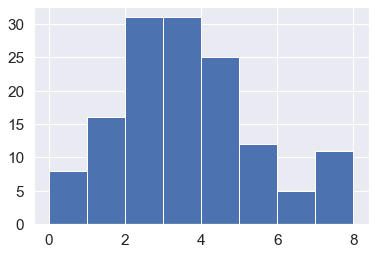

In [355]:
plt.hist(df[df['Марка стали'] == 'A']['Число бракованных листов'], bins=8)
plt.show()

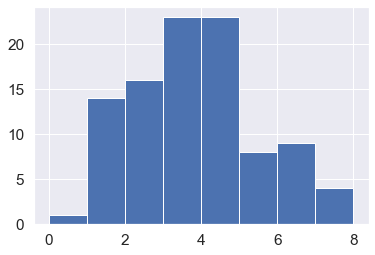

In [356]:
plt.hist(df[df['Марка стали'] == 'B']['Число бракованных листов'], bins=8)
plt.show()

В целом все выглядит пристойно, выбросов не наблюдается, мультимодальности тоже.

По условию задачи, мы не рассматриваем партии, где кол-во брака  $\leq$ 3.

Применяем двухфакторный дисперсионный анализ. 
Считаем суммы квадратов отклонений по факторам и общее.  
$S^2_a = k \sum\limits^m_{i=1}(\overline y_{i*} - \overline{y})^2$  
$S^2_b = m \sum\limits^k_{j=1}(\overline y_{*j} - \overline{y})^2$  
$S^2_w = \sum\limits^m_{i=1} \sum\limits^k_{j=1}(y_{ij} - \overline{y_{i*}} - \overline{y_{*j}} + \overline{y})^2$  

In [357]:
#df1 = df.loc[df['Число бракованных листов'] > 3]
df1 = df
mean = df1['Число бракованных листов'].mean()
std = df1['Число бракованных листов'].std(ddof=1)
n = len(df1['Число бракованных листов'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
Число бракованных листов    237 non-null int64
Скорость прокатки           237 non-null float64
Марка стали                 237 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [358]:
df1.describe()

,Число бракованных листов,Скорость прокатки
count,237.000000,237.000000
mean,3.257384,4.509705
std,1.807821,0.696260
min,0.000000,2.500000
25%,2.000000,4.100000
50%,3.000000,4.600000
75%,4.000000,5.000000
max,8.000000,6.500000


In [359]:
# Среднее для марки A:
df_1a = df1.loc[df['Марка стали'] == 'A']
mean_1a = df_1a['Число бракованных листов'].mean()
std_1a = df_1a['Число бракованных листов'].std(ddof=1)
n_1a = len(df_1a['Число бракованных листов'])
df_1a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 236
Data columns (total 3 columns):
Число бракованных листов    139 non-null int64
Скорость прокатки           139 non-null float64
Марка стали                 139 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 4.3+ KB


In [360]:
# Среднее для марки B:
df_1b = df1.loc[df['Марка стали'] == 'B']
mean_1b = df_1b['Число бракованных листов'].mean()
std_1b = df_1b['Число бракованных листов'].std(ddof=1)
n_1b = len(df_1b['Число бракованных листов'])
df_1b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 235
Data columns (total 3 columns):
Число бракованных листов    98 non-null int64
Скорость прокатки           98 non-null float64
Марка стали                 98 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ KB


In [361]:
# Среднее для скорости > 4:
df_a1 = df1.loc[df['Скорость прокатки'] > 4]
mean_a1 = df_a1['Число бракованных листов'].mean()
std_a1 = df_a1['Число бракованных листов'].std(ddof=1)
n_a1 = len(df_a1['Число бракованных листов'])
df_a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 2 to 236
Data columns (total 3 columns):
Число бракованных листов    179 non-null int64
Скорость прокатки           179 non-null float64
Марка стали                 179 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [362]:
# Среднее для скорости <= 4:
df_b1 = df1.loc[df['Скорость прокатки'] <= 4]
mean_b1 = df_b1['Число бракованных листов'].mean()
std_b1 = df_b1['Число бракованных листов'].std(ddof=1)
n_b1 = len(df_b1['Число бракованных листов'])
df_b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 233
Data columns (total 3 columns):
Число бракованных листов    58 non-null int64
Скорость прокатки           58 non-null float64
Марка стали                 58 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB


In [363]:
k, m = 2, 2
s_a = ((mean_1a - mean) ** 2 + (mean_1b - mean) ** 2) * k
s_b = ((mean_a1 - mean) ** 2 + (mean_b1 - mean) ** 2) * m
s_a, s_b

(0.0362048460593954, 0.07845766547226918)

In [364]:
mean_1a, mean_1b, mean

(3.179856115107914, 3.36734693877551, 3.257383966244726)

In [365]:
# Всего 4 группы. чтобы не плодить код, тупо сделаем 4 массива для суммирования
x_aa = df1.loc[df['Марка стали'] == 'A'].loc[df['Скорость прокатки'] > 4]['Число бракованных листов']
x_ab = df1.loc[df['Марка стали'] == 'B'].loc[df['Скорость прокатки'] > 4]['Число бракованных листов']
x_ba = df1.loc[df['Марка стали'] == 'A'].loc[df['Скорость прокатки'] <= 4]['Число бракованных листов']
x_bb = df1.loc[df['Марка стали'] == 'B'].loc[df['Скорость прокатки'] <= 4]['Число бракованных листов']

In [366]:
# s_w_aa = sum((x_aa - mean_1a - mean_a1 + mean) ** 2)
# s_w_ab = sum((x_ab - mean_1b - mean_a1 + mean) ** 2)
# s_w_ba = sum((x_ba - mean_1a - mean_b1 + mean) ** 2)
# s_w_bb = sum((x_bb - mean_1b - mean_b1 + mean) ** 2)
s_w_aa = (x_aa.median() - mean_1a - mean_a1 + mean) ** 2
s_w_ab = (x_ab.median() - mean_1b - mean_a1 + mean) ** 2
s_w_ba = (x_ba.median() - mean_1a - mean_b1 + mean) ** 2
s_w_bb = (x_bb.median() - mean_1b - mean_b1 + mean) ** 2
#s_w = s_w_aa + s_w_ab + s_w_ba + s_w_bb
s_w = s_w_aa + s_w_ab + s_w_ba + s_w_bb
s_w

0.27365080482328297

Оценки дисперсий:  
$\sigma_{a}^2 = \frac{S^2_a}{k - 1}, \sigma_{b}^2 = \frac{S^2_b}{m - 1}, \sigma_{w}^2 = \frac{S^2_w}{(k - 1)(m - 1)}$

In [367]:
sigma_a = s_a / (m - 1)
sigma_b = s_b / (k - 1)
sigma_w = s_w / ((m - 1) * (k - 1))
sigma_a, sigma_b, sigma_w

(0.0362048460593954, 0.07845766547226918, 0.27365080482328297)

Считаем статистики:  
$F_a = \frac{\sigma_{a}^2}{\sigma_{w}^2}, F_b = \frac{\sigma_{b}^2}{\sigma_{w}^2}$  
они имеют $f$- распределение с параметрами $(k-1, n-k)$ и $(m-1, n-m)$ соответственно.

In [368]:
f_a = sigma_a / sigma_w
f_b = sigma_b / sigma_w
f_a, f_b

(0.1323030863467608, 0.2867072345098171)

In [369]:
from scipy.stats import f

f_ca = f.ppf(0.95, k - 1, n - k)
f_cb = f.ppf(0.95, m - 1, n - m)
# понятно, что k = m и значения будут одинаковы, но чтобы не путаться
f_ca, f_cb

(3.8813336574500306, 3.8813336574500306)

Значение статистик не попадает в критическую область, гипотезу о равенстве средних не отвергаем.
Чешем репу как быть дальше.

In [370]:
df2 = df1
df2.loc[df1['Марка стали'] == 'A', 'Марка стали'] = 0
df2.loc[df1['Марка стали'] == 'B', 'Марка стали'] = 1
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
Число бракованных листов    237 non-null int64
Скорость прокатки           237 non-null float64
Марка стали                 237 non-null int64
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


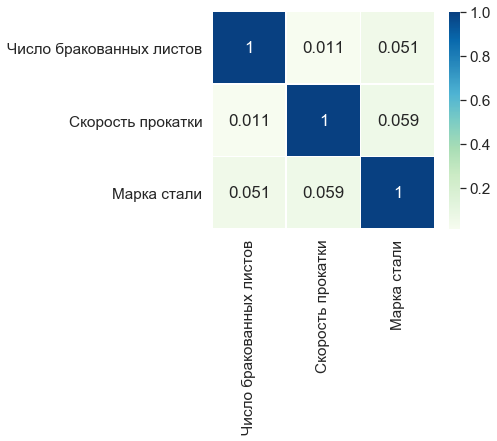

In [371]:
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.set(font_scale=1.4)
df_corr = df2.corr()
sns.heatmap(df_corr, annot=True, linewidths=.5, cmap='GnBu')
plt.show()

Похоже скорость прокатки никак не связана с маркой стали.

Все заново.

Вернемся к тому, что у нас есть испытания Бернулли, про параметры которых мы ничего не знаем.  
Гипотеза: $H_0=\{p_a=p_b\}$, где $p_a, p_b$ - вероятность успеха (брака) в испытании Бернулли.   
Берем pooled Z-test Пирсона:  
$\large Z = \sqrt{\frac{n_1n_2}{n_1 + n_2}}\frac{\widehat{p_1} - \widehat{p_2}}{\sqrt{\widehat{p}(1-\widehat{p})}} \in N(0, 1)$ (ассимптотически)  
  
где  
$\large \widehat{p_1} = \overline{x_1} / N, \widehat{p_2}= \overline{x_2} / N, \widehat{p} = \frac{n_1\widehat{p_1} + n_2\widehat{p_2}}{n_1 + n_2}$  
где $N$ - размер одной партии

In [372]:
df = pd.read_csv('E:\Arc\Synhronized\data\dataset_sev.csv', sep=',', header=0, encoding='cp1251')

In [373]:
df_1a = df.loc[df['Марка стали'] == 'A']
mean_1a = df_1a['Число бракованных листов'].mean()
std_1a = df_1a['Число бракованных листов'].std(ddof=1)
n_1a = len(df_1a['Число бракованных листов'])
mean_1a, std_1a, n_1a

(3.179856115107914, 1.8891444216400666, 139)

In [374]:
df_1b = df.loc[df['Марка стали'] == 'B']
mean_1b = df_1b['Число бракованных листов'].mean()
std_1b = df_1b['Число бракованных листов'].std(ddof=1)
n_1b = len(df_1b['Число бракованных листов'])
mean_1b, std_1b, n_1b

(3.36734693877551, 1.6891879040828492, 98)

In [375]:
n = 1000 # Тупое допущение с потолка
p_1a, p_1b = mean_1a / n, mean_1b / n 
p = (n_1a * p_1a + n_1b * p_1b) / (n_1a + n_1b)
z = (n_1a * n_1b / (n_1a + n_1b)) ** .5 * (p_1a - p_1b) / ((p * (1 - p)) ** .5)
z

-0.024945963999511947

Опять-таки не выходит

Пусть снова нормальное распределение. Проверяем гипотезу о равенстве средних двух совокупностей при неизвестных дсиперсиях.  
  

$\large Z = \frac{\overline{x_b} - \overline{x_a}}{\sqrt{\frac{s^2_a}{n_a} + \frac{s^2_b}{n_b}}}$  
имеет $t$- распределение с $\nu$ степенями свободы, где $\large \nu \approx \frac{(\frac{s^2_a}{n_a} + \frac{s^2_b}{n_b})^2}{(s^2_a / n_a)^2 / (n_a - 1) + (s^2_b / n_b)^2 / (n_b - 1)}$

In [376]:
z = (mean_1b - mean_1a) / ((std_1a ** 2 / n_1a + std_1b ** 2 / n_1b) ** .5)
z

0.8009856037385842

In [377]:
nu = ((std_1a ** 2 / n_1a + std_1b ** 2 / n_1b) ** 2) / ((std_1a ** 2) / (n_1a ** 2 * (n_1a - 1))  + (std_1b ** 2) / (n_1b ** 2 * (n_1b - 1)))
nu

682.0715535749547

In [378]:
from scipy.stats import t

In [379]:
t_cr = t.ppf(0.975, 682)
t_cr

1.963448464439343

ОПЯТЬ НЕ ПОЛУЧИЛОСЬ

Гипотеза о равенстве двух средних значений нормально распределённых генеральных совокупностей, дисперсии которых неизвестны и одинаковы (малые независимые выборки).  
$\large Z = \frac{\overline{x_a} - \overline{x_b}}{\sqrt{n_a \sigma^2_a + n_b \sigma^2_b}}\sqrt{\frac{n_an_b(n_a+n_b - 2)}{n_a + n_b}}$  
Имеет $t$-распределение с $n_a+n_b-2$ степенями свободы

In [380]:
z = (mean_1a - mean_1b)/ ((n_1a * std_1a ** 2 + n_1b * std_1b ** 2) ** .5) * (n_1a * n_1b * (n_1a + n_1b - 2) / (n_1a + n_1b)) ** .5
z                                                                              

-0.7823713620104985

In [381]:
n_1a + n_1b - 2

235

In [382]:
t.ppf(0.025, 235)

-1.9701100622670775

И снова нет.  
Пора сделать вывод о том, что средние по маркам стали видимо равны. Но это в целом. как сделать для кол-ва брака больше 3?

Новая парадигма.   
Будем считать, что появление $>$ 3 бракованных листов в партии есть успех в испытании Бернулли, соответственно, $\leq$ 3 - неудача. Наша цель - оценить параметры $p$ и проверить гипотезу об их равенстве. Использовать будем Z-тест Пирсона.

In [383]:
df = pd.read_csv('E:\Arc\Synhronized\data\dataset_sev.csv', sep=',', header=0, encoding='cp1251')

In [384]:
n_a = df.loc[df['Марка стали'] == 'A']['Число бракованных листов'].count()
p_a = df.loc[df['Марка стали'] == 'A'].loc[df['Число бракованных листов'] > 3]['Число бракованных листов'].count() / n_a
p_a, n_a

(0.381294964028777, 139)

In [385]:
df.loc[df['Марка стали'] == 'A'].loc[df['Число бракованных листов'] > 3]['Число бракованных листов'].describe()

count    53.000000
mean      5.113208
std       1.339638
min       4.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       8.000000
Name: Число бракованных листов, dtype: float64

In [386]:
n_b = df.loc[df['Марка стали'] == 'B']['Число бракованных листов'].count()
p_b = df.loc[df['Марка стали'] == 'B'].loc[df['Число бракованных листов'] > 3]['Число бракованных листов'].count() / n_b
p_b, n_b

(0.4489795918367347, 98)

Вобщем то у нас уже значение для марки B получилось выше, чем для A, что явно противоречит тому, что нужно обосновать. тем не менее, посмотрим что имеем.

Гипотеза: $H_0=\{p_a=p_b\}$, где $p_a, p_b$ - вероятность успеха (в нашем случае - кол-ва брака > 3) в испытании Бернулли.   
Берем pooled Z-test Пирсона:  
$\large Z = \sqrt{\frac{n_1n_2}{n_1 + n_2}}\frac{\widehat{p_1} - \widehat{p_2}}{\sqrt{\widehat{p}(1-\widehat{p})}} \in N(0, 1)$ (ассимптотически)  
  
где  
$\large \widehat{p_1} = \overline{x_1} / N, \widehat{p_2}= \overline{x_2} / N, \widehat{p} = \frac{n_1\widehat{p_1} + n_2\widehat{p_2}}{n_1 + n_2}$  

In [387]:
p = (n_a * p_a + n_b * p_b) / (n_a + n_b)
z = ((n_a * n_b) / (n_a + n_b)) ** .5 * ((p_a - p_b) / ((p * (1 - p)) ** .5))
z

-1.0436016837317679

Собсно с надежностью 66% мы можем утверждать, что вероятность появления более 3 листов брака выше для марки B!

Аналогично смотрим для скорости прокатки.

In [388]:
n_a = df.loc[df['Скорость прокатки'] > 4]['Число бракованных листов'].count()
p_a = df.loc[df['Скорость прокатки'] > 4].loc[df['Число бракованных листов'] > 3]['Число бракованных листов'].count() / n_a
p_a, n_a

(0.4134078212290503, 179)

In [389]:
n_b = df.loc[df['Скорость прокатки'] <= 4]['Число бракованных листов'].count()
p_b = df.loc[df['Скорость прокатки'] <= 4].loc[df['Число бракованных листов'] > 3]['Число бракованных листов'].count() / n_b
p_b, n_b

(0.39655172413793105, 58)

In [390]:
p = (n_a * p_a + n_b * p_b) / (n_a + n_b)
z = ((n_a * n_b) / (n_a + n_b)) ** .5 * ((p_a - p_b) / ((p * (1 - p)) ** .5))
z

0.22689337982109553

Здесь вообще получается что параметры равны и скорость прокатки на вероятность появления более 3 листов брака не влияет, что вообще-то контринтуитивно.